# Data Pre Processing

In [1]:
#  Libraries
import pandas as pd
import matplotlib.pyplot as plt
import re

First, we check the three datasets

In [2]:
train = pd.read_csv('train.csv')
train

,Column1,Column2
0,legitimate,https://oregonstateparks.org/index.cfm?do=geti...
1,phishing,http://business.hsbc.com.camaract.mobi/system_...
2,phishing,http://facebook.com-source-page.com/help/conta...
3,legitimate,http://michaelnielsen.org/blog/lecture-course-...
4,phishing,http://messagerie-17fr.com/fr/91da56ae94f5f4ff...
...,...,...
364194,phishing,http://www.53.com.bankingportal.id705063611986...
364195,legitimate,https://www.comic-con.org/file/012cci2015ryall...
364196,legitimate,https://cmha.ca/category/blog?post_type=blogs
364197,phishing,http://www.madanegoce.com/commerce/www.amazon....


In [3]:
valid = pd.read_csv('validation.csv')
valid

,phishing,http://www.bartekbitner.pl/libraries/fof/-/din7
0,phishing,http://www.isalechina.com/_db_backups/SecureDo...
1,legitimate,https://eheadspace.org.au/headspace-centres/mu...
2,phishing,http://www.idolhairsalon.com/google/free/free2...
3,legitimate,https://hedgebrook.org/six-questions-for-hanna...
4,phishing,http://stream.fnl.de/images/slo/cache/icon/mat...
...,...,...
104571,phishing,http://www.ecofrioindustrial.cl/config/googled...
104572,phishing,http://www.53.com.wps0177m.zarit.tk/confirm/cb...
104573,legitimate,https://www.somethingsimilar.com/2013/12/09/a-...
104574,phishing,http://tinyurl.com/l8v5dxu


Valid dataframe has no labels, needs to be fixed
We can do this by renaming the columns as column1 and column2 and just removing the entry

In [4]:
valid.columns = ['Column1', 'Column2']
valid

,Column1,Column2
0,phishing,http://www.isalechina.com/_db_backups/SecureDo...
1,legitimate,https://eheadspace.org.au/headspace-centres/mu...
2,phishing,http://www.idolhairsalon.com/google/free/free2...
3,legitimate,https://hedgebrook.org/six-questions-for-hanna...
4,phishing,http://stream.fnl.de/images/slo/cache/icon/mat...
...,...,...
104571,phishing,http://www.ecofrioindustrial.cl/config/googled...
104572,phishing,http://www.53.com.wps0177m.zarit.tk/confirm/cb...
104573,legitimate,https://www.somethingsimilar.com/2013/12/09/a-...
104574,phishing,http://tinyurl.com/l8v5dxu


In [5]:
test = pd.read_csv('test.csv')
test

,Column1,Column2
0,phishing,http://www.bartekbitner.pl/libraries/fof/-/din7
1,phishing,http://www.isalechina.com/_db_backups/SecureDo...
2,legitimate,https://eheadspace.org.au/headspace-centres/mu...
3,phishing,http://www.idolhairsalon.com/google/free/free2...
4,legitimate,https://hedgebrook.org/six-questions-for-hanna...
...,...,...
51505,phishing,http://www.promodar.ru/~paypalsu/www.paypal.co...
51506,legitimate,https://accuity.com/resources/5-cs-infographic/
51507,legitimate,https://www.elasticpath.com/resources/get-elas...
51508,legitimate,http://www.allopass.com/merchant/advert?from=s...


Since I want to split the data myself, we will merge the dataframe using the concat function

In [6]:
data = pd.concat([train, valid, test], ignore_index=True)
# Ignore index resets the index of the newly concatenated df
data

,Column1,Column2
0,legitimate,https://oregonstateparks.org/index.cfm?do=geti...
1,phishing,http://business.hsbc.com.camaract.mobi/system_...
2,phishing,http://facebook.com-source-page.com/help/conta...
3,legitimate,http://michaelnielsen.org/blog/lecture-course-...
4,phishing,http://messagerie-17fr.com/fr/91da56ae94f5f4ff...
...,...,...
520280,phishing,http://www.promodar.ru/~paypalsu/www.paypal.co...
520281,legitimate,https://accuity.com/resources/5-cs-infographic/
520282,legitimate,https://www.elasticpath.com/resources/get-elas...
520283,legitimate,http://www.allopass.com/merchant/advert?from=s...


Checking the label distribution

In [7]:
data['Column1'].value_counts()

legitimate    288282
phishing      232002
Name: Column1, dtype: int64

There are a more legitimate entries, but overall the dataset seems to be (fairly) balanced

Checking for duplicates

In [8]:
dup = data['Column2'].duplicated().sum()
print('There are ' + str(dup) + ' duplicates')

There are 51944 duplicates


Checking for rows with no value

In [9]:
nan = data['Column2'].isna().sum()
print('There are ' + str(nan) + ' rows with no value')

There are 1 rows with no value


Now we remove the duplicates and NaN and then reset the index once more

In [10]:
data = data.drop_duplicates()
data = data.dropna()
data.reset_index(drop=True, inplace=True)
# Drop parameter drops index column, inplace parameter modifies current dataframe instead of creating a new one
data

,Column1,Column2
0,legitimate,https://oregonstateparks.org/index.cfm?do=geti...
1,phishing,http://business.hsbc.com.camaract.mobi/system_...
2,phishing,http://facebook.com-source-page.com/help/conta...
3,legitimate,http://michaelnielsen.org/blog/lecture-course-...
4,phishing,http://messagerie-17fr.com/fr/91da56ae94f5f4ff...
...,...,...
468335,phishing,http://www.53.com.wps0177m.zarit.tk/confirm/cb...
468336,legitimate,https://www.somethingsimilar.com/2013/12/09/a-...
468337,phishing,http://tinyurl.com/l8v5dxu
468338,phishing,http://162.144.71.74/serv/e402b4beddb6aba50327...


This leaves us with approx. 468k entries, we can recheck label distribution

In [11]:
distribution = data['Column1'].value_counts()
# normalize parameter displays percentages
percentages = round(data['Column1'].value_counts(normalize=True), 2)

print(distribution)
print(percentages)

legitimate    259750
phishing      208590
Name: Column1, dtype: int64
legitimate    0.55
phishing      0.45
Name: Column1, dtype: float64


The dataset is relatively balanced.
Now we will check the URL length distribution using matplotlib.

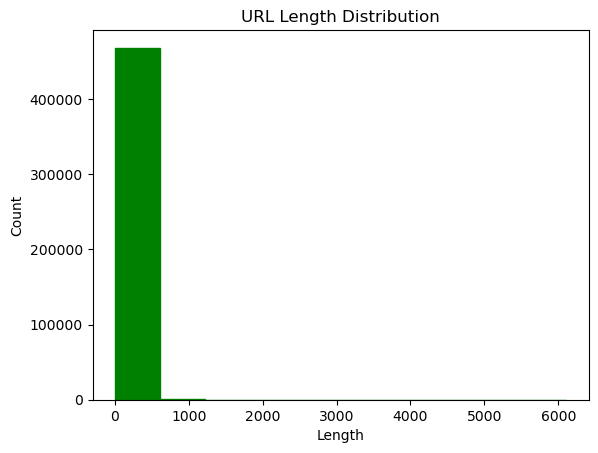

In [12]:
lengths = data['Column2'].apply(len)

plt.hist(lengths, color='green', edgecolor='green')
plt.title('URL Length Distribution')
plt.xlabel('Length')
plt.ylabel('Count')
plt.show()

Since the histogram is plotting up to a length of 6000, that means there is at least 1 URL which is at least 6000 char long.
It makes sense to truncate them to a smaller length. Since this dataset was provided by [10.1109/ACCESS.2024.3352629], it makes sense to use the same truncation length of 200

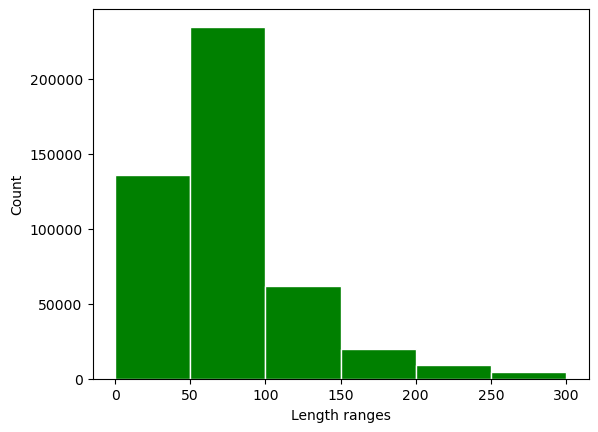

In [13]:
length_categories = [0, 50, 100, 150, 200, 250, 300]

plt.hist(lengths, length_categories, edgecolor='white', color='green')
plt.xlabel('Length ranges')
plt.ylabel('Count')

plt.savefig("length_distribution.png", format="png", dpi=300, bbox_inches="tight")

plt.show()

The majority of URLs are around 50 to 100 characters long, with the count decreasing significantly after a length of 200. 
Now we can check how many of those are over 200 char long and truncate them

In [14]:
long_urls = (lengths > 200).sum() # Counts the num of URLs with a length over 200
print("There are " + str(long_urls) + " URLs over 200 characters long")

There are 16213 URLs over 200 characters long


In [15]:
percent = round((long_urls / len(data)) * 100, 2) # Calculates how many URLs have more than 200 chars
print("That is " + str(percent) + " % of the dataset")

That is 3.46 % of the dataset


Now we will remove any illegal symbols in the dataset by using regex

In [16]:
# Regex pattern for every printable ASCII character
pattern = r'[^\x00-\x7F]' 
# Replace any characters that are not in pattern with an empty space
data['Column2'] = data['Column2'].replace(pattern, '', regex=True)

data

,Column1,Column2
0,legitimate,https://oregonstateparks.org/index.cfm?do=geti...
1,phishing,http://business.hsbc.com.camaract.mobi/system_...
2,phishing,http://facebook.com-source-page.com/help/conta...
3,legitimate,http://michaelnielsen.org/blog/lecture-course-...
4,phishing,http://messagerie-17fr.com/fr/91da56ae94f5f4ff...
...,...,...
468335,phishing,http://www.53.com.wps0177m.zarit.tk/confirm/cb...
468336,legitimate,https://www.somethingsimilar.com/2013/12/09/a-...
468337,phishing,http://tinyurl.com/l8v5dxu
468338,phishing,http://162.144.71.74/serv/e402b4beddb6aba50327...


In [17]:
# Apply truncation to dataframe URL column, remove every char after 200 if URL is longer than 200 chars
data['Column2'] = data['Column2'].apply(lambda url: url[:200] if len(url) > 200 else url)
                                       
# Check the max length to ensure the function worked properly
max_length = data['Column2'].apply(len).max()

print(max_length)

200


Renaming columns, changing the labels to 0 for legitimate and 1 for phishing and lowercasing the entries. 

In [18]:
# Lowercase the URL
data['Column2'] = data['Column2'].str.lower()

# Rename column1 and column2 to label and URL
data.rename(columns={"Column1": "label", "Column2": "url"}, inplace=True)

# Map classes to 0 and 1
data["label"] = data["label"].map({"legitimate": 0, "phishing": 1})

# Change the orientation of the columns
data = data[['url', 'label']]

data

,url,label
0,https://oregonstateparks.org/index.cfm?do=geti...,0
1,http://business.hsbc.com.camaract.mobi/system_...,1
2,http://facebook.com-source-page.com/help/conta...,1
3,http://michaelnielsen.org/blog/lecture-course-...,0
4,http://messagerie-17fr.com/fr/91da56ae94f5f4ff...,1
...,...,...
468335,http://www.53.com.wps0177m.zarit.tk/confirm/cb...,1
468336,https://www.somethingsimilar.com/2013/12/09/a-...,0
468337,http://tinyurl.com/l8v5dxu,1
468338,http://162.144.71.74/serv/e402b4beddb6aba50327...,1


Save to raw_dataset.csv

In [19]:
# Save dataset
data.to_csv('baseline_dataset.csv', index=True)
data

,url,label
0,https://oregonstateparks.org/index.cfm?do=geti...,0
1,http://business.hsbc.com.camaract.mobi/system_...,1
2,http://facebook.com-source-page.com/help/conta...,1
3,http://michaelnielsen.org/blog/lecture-course-...,0
4,http://messagerie-17fr.com/fr/91da56ae94f5f4ff...,1
...,...,...
468335,http://www.53.com.wps0177m.zarit.tk/confirm/cb...,1
468336,https://www.somethingsimilar.com/2013/12/09/a-...,0
468337,http://tinyurl.com/l8v5dxu,1
468338,http://162.144.71.74/serv/e402b4beddb6aba50327...,1


In [20]:
data['label'].value_counts()

0    259750
1    208590
Name: label, dtype: int64